### 7.9.1 Bisection Algorithm Implementation
1. The first step in implementing any search algorithm is to get an idea of what your function looks like. For the present problem you do this by making a plot of $f (E) =\sqrt{10 − E_B} \tan(\sqrt{10} − E_B ) − \sqrt {E_B}$ versus $E_B$ . Note from your plot some approximate values at which $f (E_B ) = 0$. Your program should be able to find more exact values for these zeros.
2. Write a program that implements the bisection algorithm and use it to find some solutions
of $(7.21)$.
3. Warning: Because the tan function has singularities, you have to be careful. In fact,
your graphics program (or Maple) may not function accurately near these singularities.
One cure is to use a different but equivalent form of the equation. Show that an equivalent
form of $(7.21)$ is

\begin{equation}
 \sqrt E \cot(√10 − E) − \sqrt{10 − E} = 0$  \hspace{50pt}   $(7.24)
\end{equation}

4. Make a second plot of (7.24), which also has singularities but at different places. Choose
some approximate locations for zeros from this plot.
5. Compare the roots you find with those given by Maple or Mathematica.

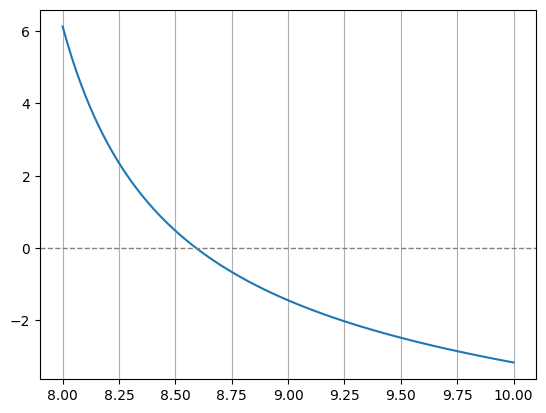

la raiz es 8.59278527522838
El valor de la raiz utilizando Scipy es, 8.592785275230199 y su error absoluto, 1.8189894035458565e-12


C:\Users\ivans\AppData\Local\Temp\ipykernel_11228\1355459543.py:51: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.tan(x)


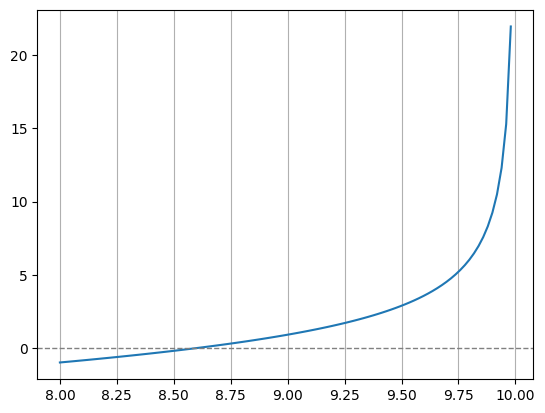

8.59278527522838
El valor de la raiz utilizando Scipy es, 8.592785275230199 y su error absoluto, 5.4569682106375694e-12


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


class BisectionAlgorithm:
    def __init__(self, func, x):
        self.func = func
        self.x = x

    def initialPlot(self):
        ax, fig = plt.subplots()
        plt.plot(self.x, self.func(self.x))
        plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
        plt.grid(True, axis='x')
        plt.show()

    def algorithm(self, a, b, tol=1e-10, max_iter=1000):

        if self.func(a) * self.func(b) >= 0:
            raise ValueError("f(a) y f(b) deben tener signos opuestos")

        count = 0

        while abs(self.func(a) - self.func(b)) > tol and count < max_iter:
            count += 1
            c = 0.5 * (a + b)
            if self.func(c) == 0.0:
                return c

            if self.func(a) * self.func(c) < 0:
                b = c

            else:
                a = c

        return (a + b) / 2.0

    def comparision(self, a, b, tol=1e-10):
        sp_root = sp.optimize.bisect(self.func, a, b)
        error = abs(sp_root - self.algorithm(a, b, tol, max_iter=1000))
        return f'El valor de la raiz utilizando Scipy es, {sp_root} y su error absoluto, {error}'


def even_wavefunction(Eb):
    return np.sqrt(10 - Eb) * np.tan(np.sqrt(10 - Eb)) - np.sqrt(Eb)


def even_wavefunction2(E):
    def cot(x):
        return 1 / np.tan(x)

    return np.sqrt(E) * cot(np.sqrt(10 - E)) - np.sqrt(10 - E)


Eb = E = np.linspace(8, 10, 100)

bisection = BisectionAlgorithm(even_wavefunction, Eb)
bisection.initialPlot()
root = BisectionAlgorithm(even_wavefunction, Eb).algorithm(8.5, 8.75)
print("la raiz es",root)
print(bisection.comparision(8.5, 8.75))

bisection2 = BisectionAlgorithm(even_wavefunction2, E)
bisection2.initialPlot()
root2 = BisectionAlgorithm(even_wavefunction, Eb).algorithm(8.5, 8.75)
print(root)
print(bisection2.comparision(8.5, 8.75))

